In [31]:
import os
from torchvision.utils import make_grid
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [32]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

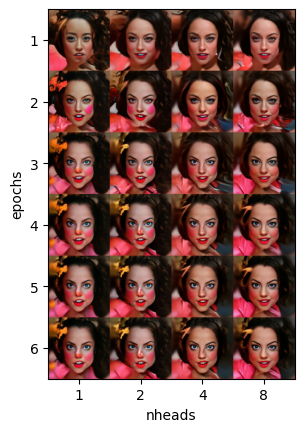

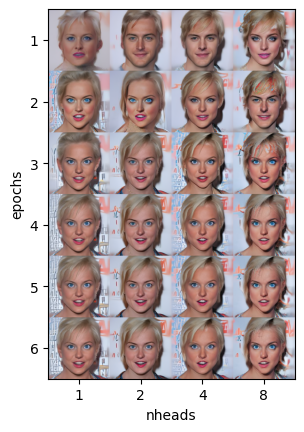

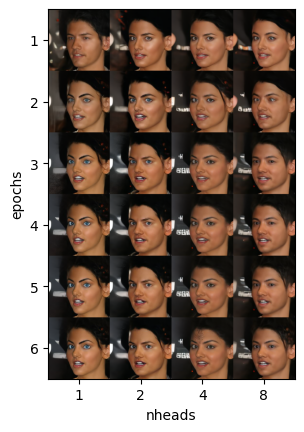

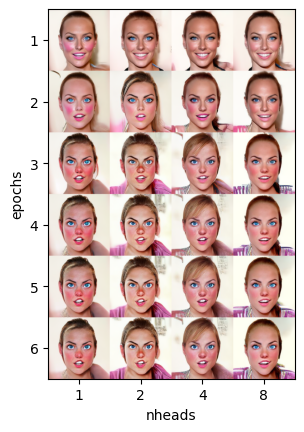

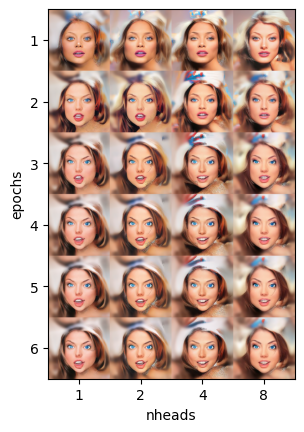

In [104]:
def ablation_epochs_vs_heads(reconstructed=False, image_idx=0):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation")

    nheads = [1,2,4,8]
    epochs = [0,1,2,3,4,5]

    image_rows = []
    for nhead in nheads:
        image_row = []
        for epoch in epochs:
            if reconstructed:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "reconstructed" / f"test_{image_idx}_19_ngen40_reconstructed.png"
            else:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))
            # if epoch == 0:
            #     image_array[:100] = 0

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    image_grid = np.concatenate(image_rows, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(4) + 128, ("1","2","4","8"))
    ax.set_yticks([256] * np.arange(6) + 128, ("1","2","3","4", "5", "6"))
    ax.set_ylabel('epochs')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    if reconstructed:
        plt.savefig(f"epochs_vs_heads_img{image_idx}_recon.png", bbox_inches='tight', pad_inches=0, dpi=300)
    else:    
        plt.savefig(f"epochs_vs_heads_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

for i in range(5):
    ablation_epochs_vs_heads(image_idx=i, reconstructed=False)

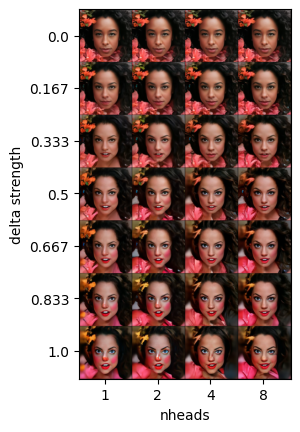

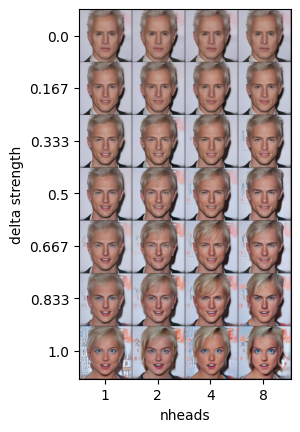

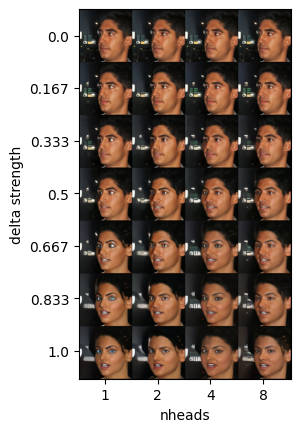

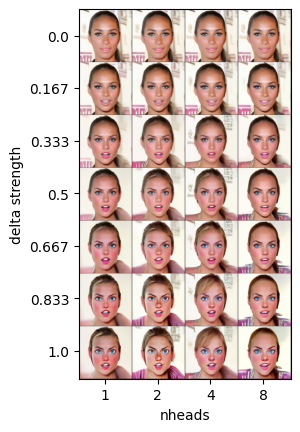

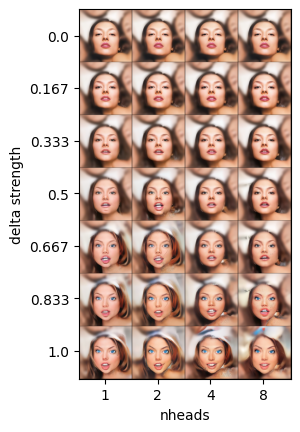

In [100]:
def ablation_epochs_vs_deltas(reconstructed=False, image_idx=0):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation")

    nheads = [1,2,4,8]

    image_cols = []
    for nhead in nheads:
        image_path = basepath / f"h{nhead}" / "40" / f"test_{image_idx}_19_ngen40.png"

        # read image
        image_array = np.array(Image.open(image_path).convert('RGB'))

        image_cols.append(image_array)

    image_grid = np.concatenate(image_cols, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(4) + 128, ("1","2","4","8"))
    # from script
    min_delta = 0
    max_delta = 1
    num_delta = 7
    strengths = np.linspace(min_delta, max_delta, num_delta)
    strengths = [f"{s:.3}" for s in strengths]
    ax.set_yticks([256] * np.arange(7) + 128, strengths)
    ax.set_ylabel('delta strength')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    plt.savefig(f"dstrength_vs_heads_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)
    # plt.show()

for i in range(5):
    ablation_epochs_vs_deltas(image_idx=i)

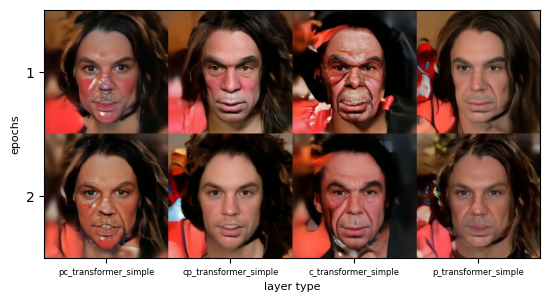

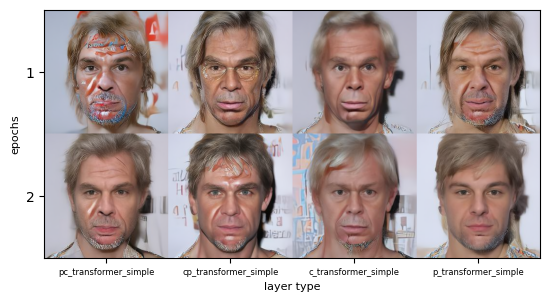

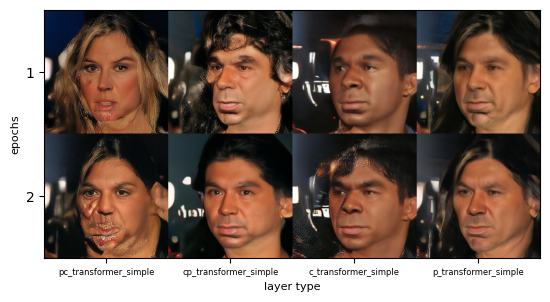

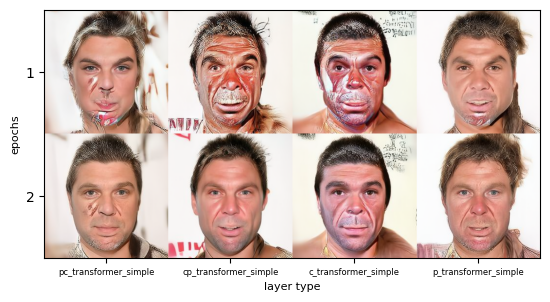

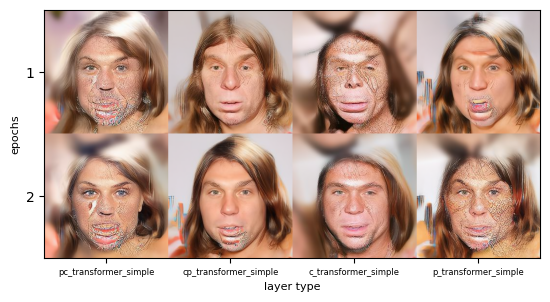

In [110]:
def ablation_epochs_vs_layer(reconstructed=False, image_idx=0):
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation")

    layertype = ['pc_transformer_simple', 'cp_transformer_simple', 'c_transformer_simple', 'p_transformer_simple']
    # epochs = [0,1,2,3,4,5]
    epochs = [0,1]

    image_rows = []
    for layer in layertype:
        image_row = []
        for epoch in epochs:
            image_path = basepath / f"{layer}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))
            # if epoch == 0:
            #     image_array[:100] = 0

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    image_grid = np.concatenate(image_rows, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(4) + 128, layertype)
    ax.set_yticks([256] * np.arange(6) + 128, ("1","2","3","4", "5", "6"))
    ax.set_ylabel('epochs')
    ax.set_xlabel('layer type')
    
    plt.imshow(image_grid)
    plt.savefig(f"epochs_vs_layer_img{image_idx}.png", bbox_inches='tight', pad_inches=0, dpi=300)

    plt.show()

plt.rc('xtick', labelsize=6)
for i in range(5):
    ablation_epochs_vs_layer(image_idx=i)